In [6]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import MinMaxScaler

In [7]:
#Loading the dataset
df = pd.read_csv('C://Users//rajas//Downloads//Diabetes.csv')
#prints the first 5 rows of the dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [8]:
#check the data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [9]:
#To check the null values in the dataset we can use the isnull() function.
#The sum() function provides the total number of null values present in each column.
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
# checking for zero values in columns where 0 is invalid
columns_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("Number of invalid zero values in each column:")
for col in columns_with_invalid_zeros:
    print(f"{col}: {(df[col] == 0).sum()}")

Number of invalid zero values in each column:
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


In [11]:
# Statistical Analysis of the dataset
# The describe() function is used to generate descriptive overview of the dataset.
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

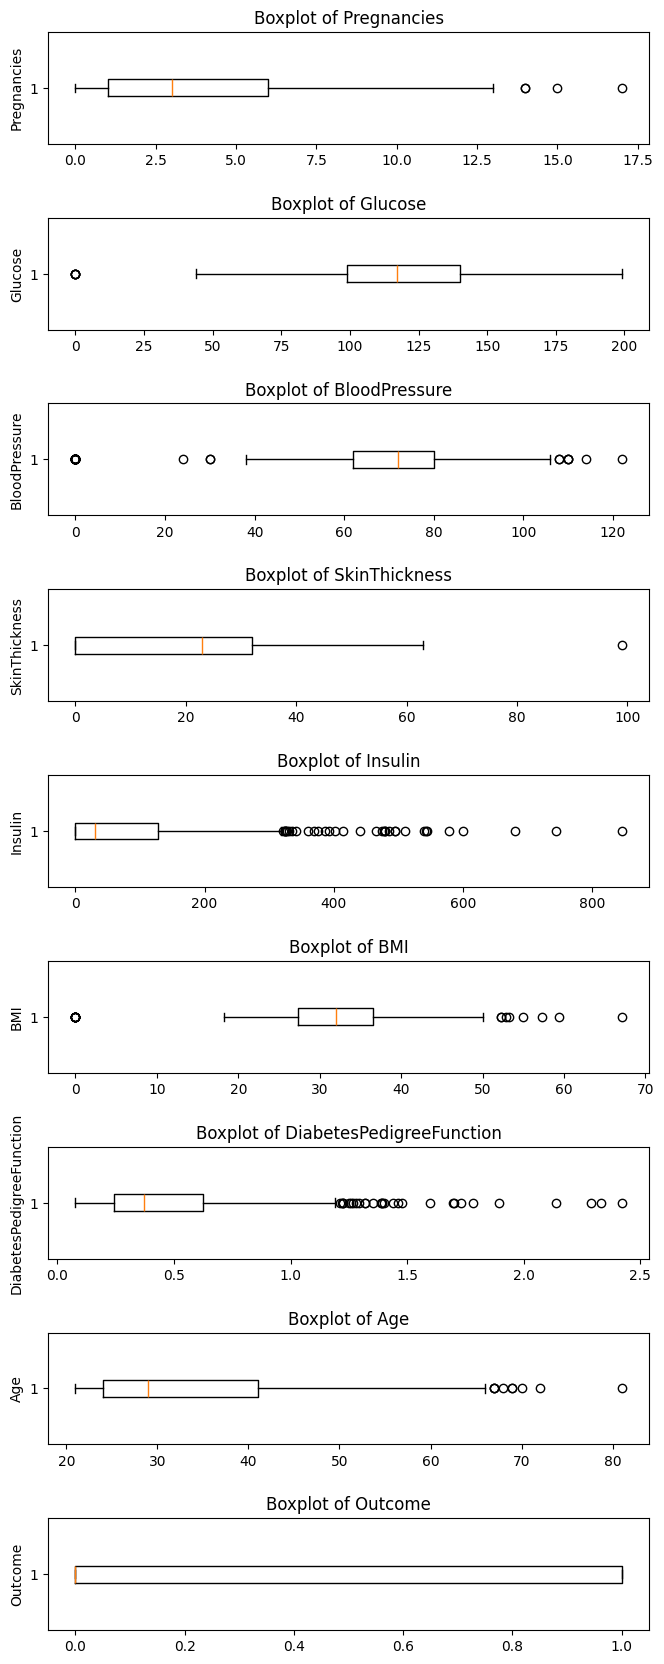

In [12]:
# Checking the outliers in the dataset using Boxplot analysis
fig, axis = plt.subplots(9,1, dpi = 100, figsize = (7,17))
i = 0
for col in df.columns:
    axis[i].boxplot(df[col], vert = False)
    axis[i].set_title('Boxplot of ' + col)
    axis[i].set_ylabel(col)
    i+=1
plt.tight_layout(pad=2)
plt.show()

In [13]:
# Dropping the 'Outliers' from the dataset based on the Boxplot analysis

# identifying the outliers using IQR method for the 'Pregnancies' column
# identifying the quartiles
q1, q3 = np.percentile(df['Pregnancies'], [25, 75])
# calculating the interquartile range (IQR)
iqr = q3 - q1
# calculating the lower and upper bounds for outliers
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)
#dropping the outliers
clean_data = df[(df['Pregnancies'] >= lower_bound) & (df['Pregnancies'] <= upper_bound)]

# identifying the outliers using IQR method for the 'Glucose' column
# identifying the quartiles
q1, q3 = np.percentile(df['Glucose'], [25, 75])
# calculating the interquartile range (IQR)
iqr = q3 - q1
# calculating the lower and upper bounds for outliers
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)
#dropping the outliers
clean_data = clean_data[(clean_data['Glucose'] >= lower_bound) & (clean_data['Glucose'] <= upper_bound)]

# identifying the outliers using IQR method for the 'BloodPressure' column
# identifying the quartiles
q1, q3 = np.percentile(df['BloodPressure'], [25, 75])
# calculating the interquartile range (IQR)
iqr = q3 - q1
# calculating the lower and upper bounds for outliers
lower_bound = q1-(0.75*iqr)
upper_bound = q3+(0.75*iqr)
#dropping the outliers
clean_data = clean_data[(clean_data['BloodPressure'] >= lower_bound) & (clean_data['BloodPressure'] <= upper_bound)]

# identifying the outliers using IQR method for the 'SkinThickness' column
# identifying the quartiles
q1, q3 = np.percentile(df['SkinThickness'], [25, 75])
# calculating the interquartile range (IQR)
iqr = q3 - q1
# calculating the lower and upper bounds for outliers
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)
#dropping the outliers
clean_data = clean_data[(clean_data['SkinThickness'] >= lower_bound) & (clean_data['SkinThickness'] <= upper_bound)]

# identifying the outliers using IQR method for the 'Insulin' column
# identifying the quartiles
q1, q3 = np.percentile(df['Insulin'], [25, 75])
# calculating the interquartile range (IQR)
iqr = q3 - q1
# calculating the lower and upper bounds for outliers
lower_bound = q1-(1*iqr)
upper_bound = q3+(1*iqr)
#dropping the outliers
clean_data = clean_data[(clean_data['Insulin'] >= lower_bound) & (clean_data['Insulin'] <= upper_bound)]

# identifying the outliers using IQR method for the 'BMI' column
# identifying the quartiles
q1, q3 = np.percentile(df['BMI'], [25, 75])
# calculating the interquartile range (IQR)
iqr = q3 - q1
# calculating the lower and upper bounds for outliers
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)
#dropping the outliers
clean_data = clean_data[(clean_data['BMI'] >= lower_bound) & (clean_data['BMI'] <= upper_bound)]

# identifying the outliers using IQR method for the 'DiabetesPedigreeFunction' column
# identifying the quartiles
q1, q3 = np.percentile(df['DiabetesPedigreeFunction'], [25, 75])
# calculating the interquartile range (IQR)
iqr = q3 - q1
# calculating the lower and upper bounds for outliers
lower_bound = q1-(1*iqr)
upper_bound = q3+(1*iqr)
#dropping the outliers
clean_data = clean_data[(clean_data['DiabetesPedigreeFunction'] >= lower_bound) & (clean_data['DiabetesPedigreeFunction'] <= upper_bound)]

# identifying the outliers using IQR method for the 'Age' column
# identifying the quartiles
q1, q3 = np.percentile(df['Age'], [25, 75])
# calculating the interquartile range (IQR)
iqr = q3 - q1
# calculating the lower and upper bounds for outliers
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)
#dropping the outliers
clean_data = clean_data[(clean_data['Age'] >= lower_bound) & (clean_data['Age'] <= upper_bound)]

# checking the shape of the dataset before removing outliers
print("Shape of the dataset before removing outliers: ", df.shape)

# checking the shape of the dataset after removing outliers
print("Shape of the dataset after removing outliers: ", clean_data.shape)

Shape of the dataset before removing outliers:  (768, 9)
Shape of the dataset after removing outliers:  (575, 9)


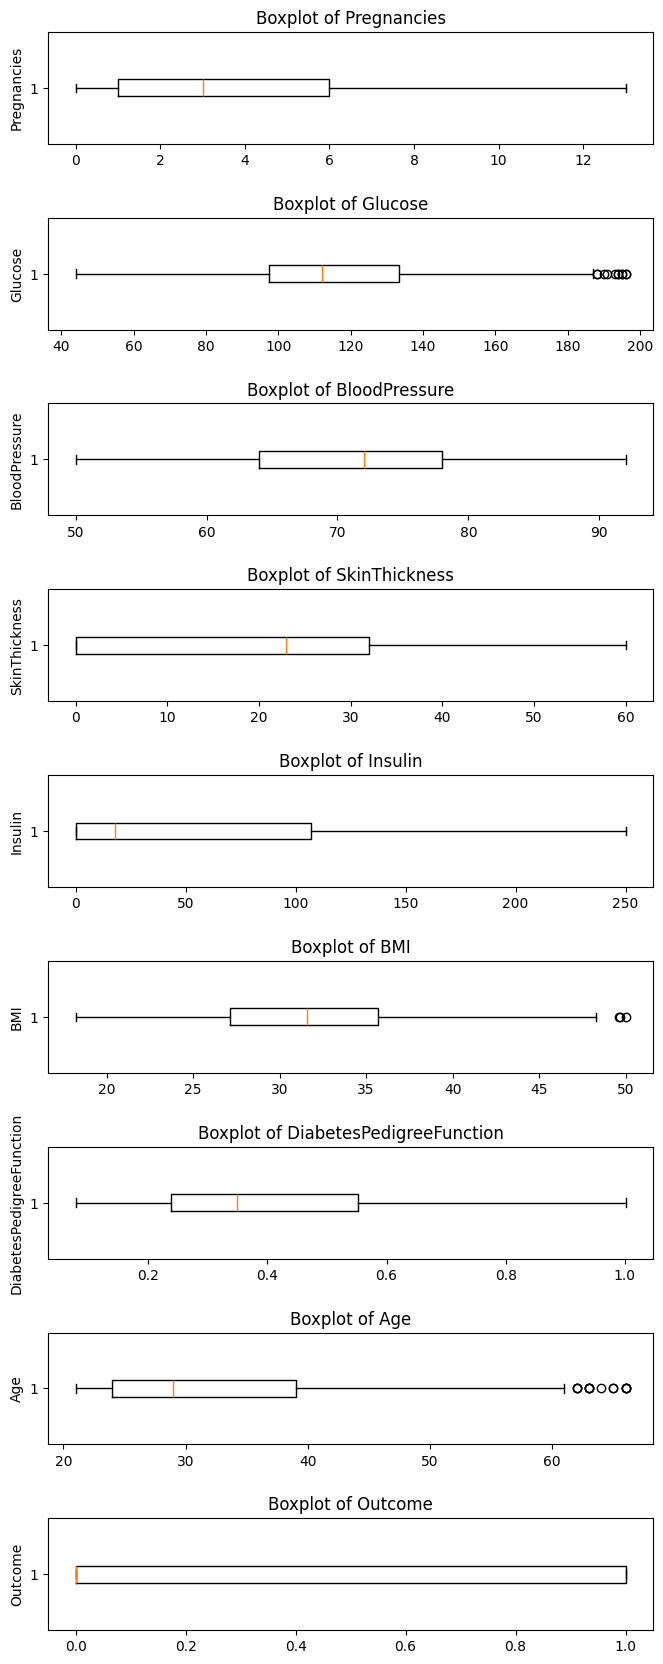

In [14]:
# Checking the outliers in the dataset using Boxplot analysis after removing outliers
# After removing outliers, we can visualize the data again using boxplots to confirm that the outliers have been removed.
fig, axis = plt.subplots(9,1, dpi = 100, figsize = (7,17))
i = 0
for col in clean_data.columns:
    axis[i].boxplot(clean_data[col], vert = False)
    axis[i].set_title('Boxplot of ' + col)
    axis[i].set_ylabel(col)
    i+=1
plt.tight_layout(pad=2)
plt.show()

In [16]:
# Replacing the zero values with NaN
# The replace() function is used to replace the zero values with NaN in the specified columns.
columns_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_invalid_zeros] = df[columns_with_invalid_zeros].replace(0, np.nan)

# Checking the null values in the dataset after replacing zero values with NaN
print(df.isna().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [17]:
# With the help of fillna() function, the NaN values will be replaced with the median of the respective columns.
df.fillna(df.median(numeric_only=True), inplace=True)

print(df.isna().sum())



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [20]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features and target variable
X = df.drop('Outcome',axis=1)
y = df['Outcome']

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")

Training Samples: 614
Testing Samples: 154


In [21]:
# Training and Evaluating a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Intializing the Logistic Regression Model
model = LogisticRegression(max_iter=200)

#fitting the model on the training data
model.fit(X_train, y_train)

# Predicting on the test data
y_pred = model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Accuracy: 0.7532467532467533
Confusion Matrix:
 [[82 17]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [23]:
# Training and evaluating a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Intializing the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predicting on the test data
tree_pred = tree_model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, tree_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, tree_pred))
print("Classification Report:\n", classification_report(y_test, tree_pred))

Accuracy: 0.7207792207792207
Confusion Matrix:
 [[76 23]
 [20 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [25]:
# Training and Evaluating the Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initializing the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# predicting on the test data
rf_pred = rf_model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test,rf_pred))
print("Confusion matrix:\n", confusion_matrix(y_test,rf_pred))
print("Classification Report:\n", classification_report(y_test,rf_pred))

Accuracy: 0.7467532467532467
Confusion matrix:
 [[78 21]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [26]:
# Training and evaluating the KNN(K-Nearest Neighbors) Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initializing the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# predicting on the test data
knn_pred = knn_model.predict(X_test)

# Evaluating the model
print("Accuracy Score:", accuracy_score(y_test, knn_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("Classification Report:\n", classification_report(y_test, knn_pred))

Accuracy Score: 0.6753246753246753
Confusion Matrix:
 [[70 29]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        99
           1       0.54      0.62      0.58        55

    accuracy                           0.68       154
   macro avg       0.65      0.66      0.66       154
weighted avg       0.69      0.68      0.68       154



In [27]:
# Training and Evaluating the SVM(Support Vector Machine) Classifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Scaling the features using StandardScaler
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

from sklearn.svm import SVC

# Initializing the SVM classifier
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_scaled, y_train)

# predicting on the test data
svm_pred = svm_model.predict(X_test_scaled)

# Evaluating the model
print("Accuracy Score:", accuracy_score(y_test, svm_pred))
print("Confusion_matrix:\n", confusion_matrix(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))

Accuracy Score: 0.7467532467532467
Confusion_matrix:
 [[83 16]
 [23 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.67      0.58      0.62        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



In [29]:
# Training and evaluating the Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initializing the Navie Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# predicting on the test data
nb_pred = nb_model.predict(X_test)

# Evaluating the model
print("Accuracy Score:", accuracy_score(y_test, nb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))
print("Classification report:\n", classification_report(y_test, nb_pred))

Accuracy Score: 0.7532467532467533
Confusion Matrix:
 [[79 20]
 [18 37]]
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

# Initializing the MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train_Scaled, y_train)

# predicting on the test data
mlp_pred = mlp_model.predict(X_test_Scaled)

#Evaluating the model
print("Accuracy Score:", accuracy_score(y_test, mlp_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, mlp_pred))
print("Classification Report:\n", classification_report(y_test, mlp_pred))

Accuracy Score: 0.7142857142857143
Confusion Matrix:
 [[77 22]
 [22 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        99
           1       0.60      0.60      0.60        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



C:\Users\rajas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
# ingoring warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# building the model performance dataframe
model_performance = []

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
models = {
    "Logistic Regression" : LogisticRegression(max_iter=200),
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier" : RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN" : KNeighborsClassifier(n_neighbors=5),
    "SVM" : SVC(kernel='rbf', probability=True),
    "Naive Bayes" : GaussianNB(),
    "Neural Network (MLP)" : MLPClassifier(hidden_layer_sizes = (100,), max_iter=300, random_state=42)
}

for name, model in models.items():
    if name in ["KNN", "SVM", "Neural Network (MLP)"]:
        model.fit(X_train_Scaled, y_train)
        y_pred = model.predict(X_test_Scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    model_performance.append({
        "Model Name": name,
        "Accuracy" : accuracy,
        "Confusion Matrix" : cm,
        "Classification Report" : cr,
        "Recall" : recall,
        "Precision" : precision,
        "F1 Score" : f1
    })

performance_df = pd.DataFrame(model_performance)
print(performance_df)

                 Model Name  Accuracy      Confusion Matrix  \
0       Logistic Regression  0.753247  [[82, 17], [21, 34]]   
1             Decision Tree  0.720779  [[76, 23], [20, 35]]   
2  Random Forest Classifier  0.746753  [[78, 21], [18, 37]]   
3                       KNN  0.720779  [[74, 25], [18, 37]]   
4                       SVM  0.746753  [[83, 16], [23, 32]]   
5               Naive Bayes  0.753247  [[79, 20], [18, 37]]   
6      Neural Network (MLP)  0.714286  [[77, 22], [22, 33]]   

                               Classification Report    Recall  Precision  \
0                precision    recall  f1-score   ...  0.618182   0.666667   
1                precision    recall  f1-score   ...  0.636364   0.603448   
2                precision    recall  f1-score   ...  0.672727   0.637931   
3                precision    recall  f1-score   ...  0.672727   0.596774   
4                precision    recall  f1-score   ...  0.581818   0.666667   
5                precision    rec

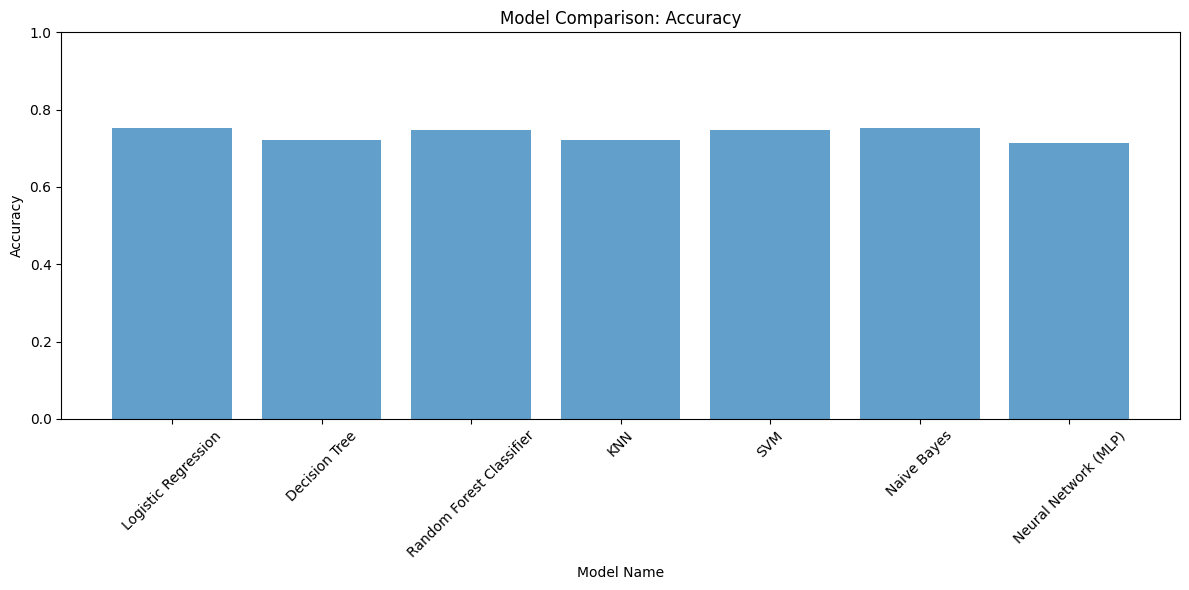

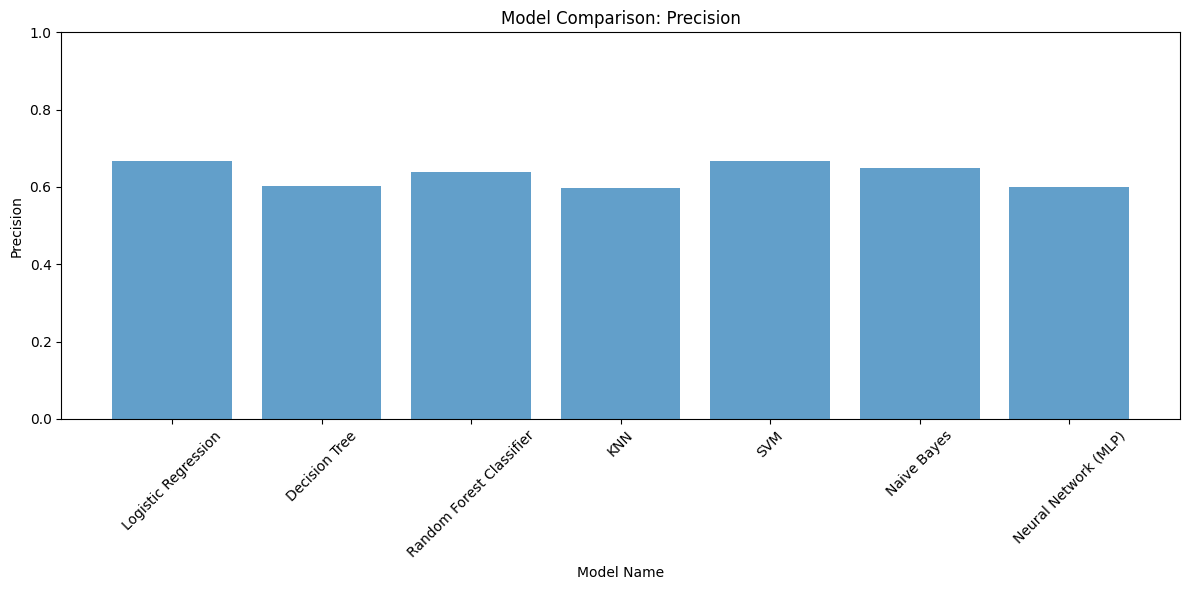

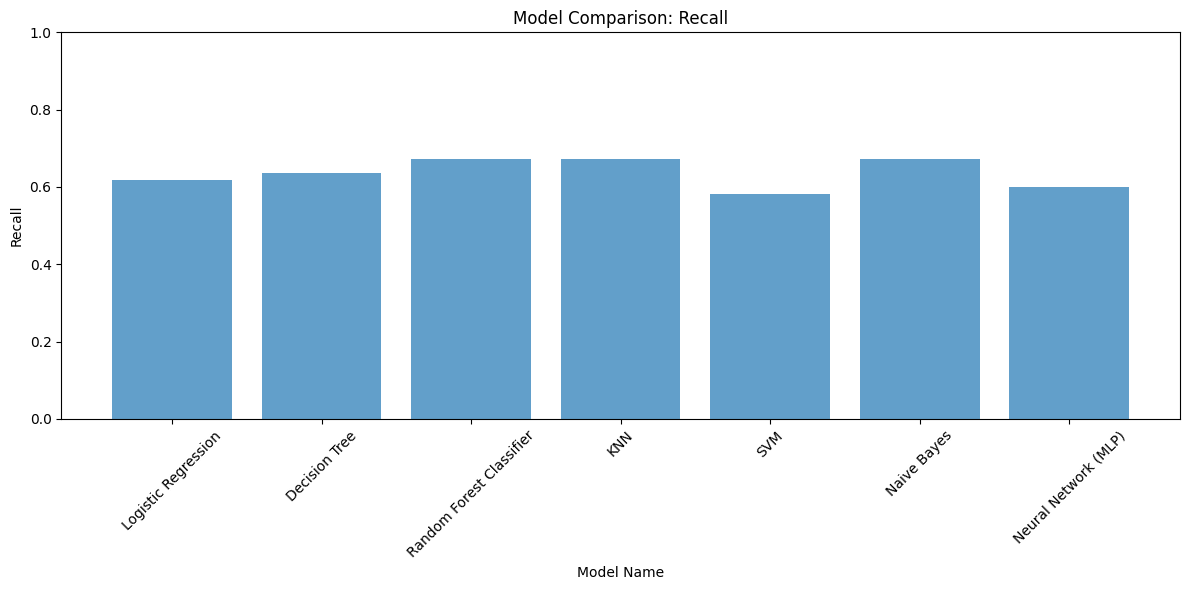

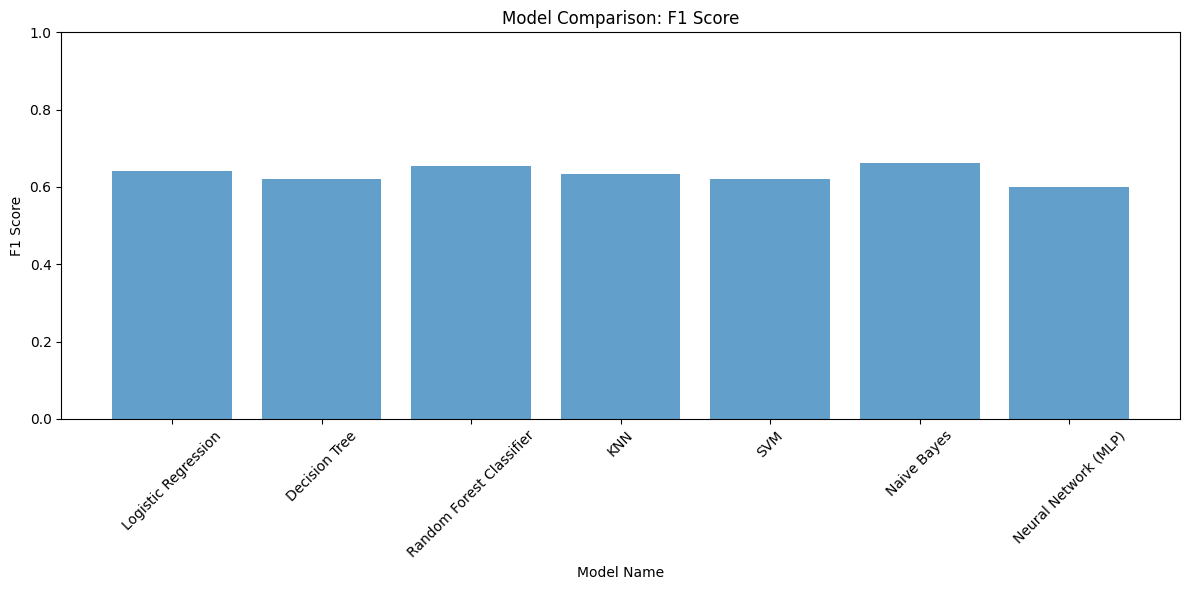

In [38]:
# Implementing the Bar Plot for Model Performance using pyplot

import matplotlib.pyplot as plt

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.bar(performance_df["Model Name"], performance_df[metric], alpha=0.7)
    plt.title(f"Model Comparison: {metric}")
    plt.xticks(rotation=45)
    plt.xlabel("Model Name")
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()